Suppose, we are given a set of 2-D points ${(x_1,y_1),(x_2,y_2) ..(x_n,y_n)}$ and we would want to approximate these points by a straight line, we can use **[linear regression](https://en.wikipedia.org/wiki/Linear_regression)**. As we know, any straight line is of the form $f(x) =  w_1 x + w_0$ (slope-intercept form). To fit such a line on the given points, we just have to find appropriate values for $w_0$ and $w_1$. This can be done using **gradient descent**. Take a look at **[this](https://github.com/rajcscw/minimalistic-ml/blob/master/gradient-descent/gradient-descent.ipynb)** if you are not familiar with it. But, remember gradient descent requires an objective function that is to be minimized. In linear regression, that objective function is the quality of fit of the line to the data points. This quality can be measured in terms of squared error between the actual value and value fitted using the line. It is generally known as **squared loss** and denoted by $L$. For each point $x_i$, it is defined as

\begin{equation}
L_i = (f(x_i) - y_i)^2
\end{equation}

<img src="points.svg" alt="Points" width="30%"/>

In gradient descent, we start with random values for $w_0$ and $w_1$. Then, we make small adjustments to them which results in reduced loss. The update equations are simple:

\begin{equation}
w_0 = w_0 - \eta \nabla_{w_0} \\
w_1 = w_1 - \eta \nabla_{w_1}
\end{equation}

The $\nabla_{w_0}$ and $\nabla_{w_1}$ are the partial derivates of $L_i$ w.r.t to $w_0$ and $w_1$ respectively. 

\begin{align}
\nabla_{w_0}  & = \frac{\partial L_i}{\partial w_0} = \frac{\partial}{\partial w_0} (f(x_i) - y_i)^2\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_0} (f(x_i) - y_i) \\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_0} ( w_1 x_i + w_0- y_i) \\
&= 2 (f(x_i) - y_i )  ( 1 ) \\
&= 2 (f(x_i) - y_i )
\end{align}

\begin{align}
\nabla_{w_1}  & = \frac{\partial L_i}{\partial w_1} = \frac{\partial}{\partial w_1} (f(x_i) - y_i)^2\\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_1} (f(x_i) - y_i) \\
&= 2 (f(x_i) - y_i )\frac{\partial}{\partial w_1} ( w_1 x_i + w_0- y_i) \\
&= 2 (f(x_i) - y_i )  ( x_i ) \\
\end{align}

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

In [17]:
def fun(w0, w1, x):
    return w1 * x + w0

In [18]:
# Generate sample points
X = 1.0 * np.random.randint(0, 100, 100)
Y = 2 * X + 10
noise = 2.0*np.random.randn(Y.shape[0])
Y += noise

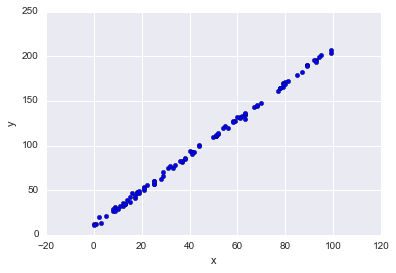

In [19]:
# Plot the points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X,Y)

In [20]:
# Initialize weight w0, w1
w0 = np.random.randint(0,100)
w1 = np.random.randint(0,100)

In [21]:
# Parameters
n_iter = 1000
step_size = 9e-5
n = X.shape[0]

In [22]:
# Fit a model using stochastic gradient descent
for i in range(n_iter):
    for j in range(n):
        # x and y
        x = X[j]
        y = Y[j]

        # f
        f = fun(w0, w1, x)

        # Compute gradients
        w0_grad = 2 * (f - y)
        w1_grad = 2 * (f - y) * x

        # Update weights using stochastic gradient descent
        w0 += -step_size * w0_grad
        w1 += -step_size * w1_grad

    # Print squared loss at each iteration
    loss = np.sum((fun(w0, w1, X) - Y)**2)
    print("Loss: "+str(loss))

Loss: 40633.495667
Loss: 40261.9130384
Loss: 39893.93967
Loss: 39529.5398503
Loss: 39168.6782244
Loss: 38811.3197908
Loss: 38457.4298976
Loss: 38106.974239
Loss: 37759.9188519
Loss: 37416.2301124
Loss: 37075.8747324
Loss: 36738.8197564
Loss: 36405.0325578
Loss: 36074.4808359
Loss: 35747.1326127
Loss: 35422.9562292
Loss: 35101.9203428
Loss: 34783.9939236
Loss: 34469.1462516
Loss: 34157.3469134
Loss: 33848.5657993
Loss: 33542.7731
Loss: 33239.9393039
Loss: 32940.0351939
Loss: 32643.0318443
Loss: 32348.9006184
Loss: 32057.613165
Loss: 31769.1414159
Loss: 31483.4575831
Loss: 31200.5341555
Loss: 30920.3438969
Loss: 30642.8598424
Loss: 30368.0552964
Loss: 30095.9038295
Loss: 29826.3792758
Loss: 29559.4557306
Loss: 29295.1075474
Loss: 29033.3093355
Loss: 28774.0359575
Loss: 28517.2625264
Loss: 28262.9644036
Loss: 28011.117196
Loss: 27761.6967539
Loss: 27514.6791682
Loss: 27270.040768
Loss: 27027.7581187
Loss: 26787.808019
Loss: 26550.1674989
Loss: 26314.8138174
Loss: 26081.7244601
Loss: 25850

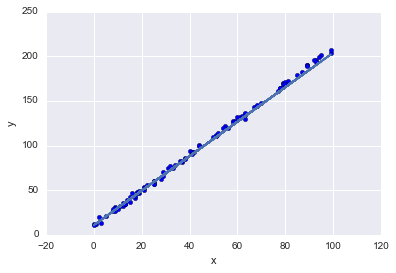

In [23]:
# Plot the predicted line
Y_pred = fun(w0, w1, X)
ax.plot(X,Y_pred)
display(fig)

In [24]:
print("w1="+str(w1)+", w0="+str(w0))

w1=1.92945463954, w0=10.8857800021
